## Titanic: Machine Learning from Disaster

O desafio do Titanic é uma das competições mais famosas, e é promovida pelo site kaggle.com. Tamanha popularidade desta competição fez com que ela fosse considerada como sendo um Hello, World! para o universo fantástico do Data Science (Ciência de Dados).

Com certeza, a maioria de vocês conhece a história por trás do naufrágio deste que seria o navio mais moderno do mundo para a época. Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros.

Obviamente, aqueles que sobreviveram à tragédia contaram com muita sorte, mas será que alguns grupos de passageiros não tiveram "mais sorte" que outros grupos? Será que crianças e mulheres realmente tiveram mais chances de sobreviver? Será que o Jack teve menos chances de escapar do seu destino trágico que a Rose, só pelo fato de ele ter embarcado na 3ª Classe?

Com os dados reais disponibilizados, agora você pode fazer uma análise exploratória, testar suas hipóteses e até mesmo construir um modelo preditivo (que tal descobrir quais seriam suas chances de sobrevivência na 1ª Classe se você tivesse viajado com sua esposa e filho?!)

## Checklist
- Definição do Problema
- Obtenção dos Dados
- Exploração dos Dados
- Preparação dos Dados
- Construção do Modelo

## Avaliação

### 1. Definição do Problema
A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle Titanic: Machine Learning from Disaster.

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

### Objetivo
Espera-se que você consiga fazer uma análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, espera-se também que você seja capaz de construir um modelo que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input.

### Métrica de Desempenho
O score é calculado em relação ao número de previsões corretas que seu modelo fez. Ou seja, é considerada apenas a acurácia do modelo.

## 2. Obtenção dos Dados

Os dados disponibilizados pelo Kaggle foram divididos em dois grupos:

- Dataset de treino (train.csv)
    - Deve ser usado para construir o modelo de Machine Learning. Neste conjunto de dados, é informado se o passageiro sobreviveu ou não.
    - Composto por diversas features como gênero do passageiro e classe do embarque.
- Dataset de Teste (test.csv)
    - Deve ser usado como dados que nunca forma vistos pelo modelo. Neste conjunto de dados, não é informado se o passageiro sobreviveu ou não.
    - Também é disponibilizado um modelo (gabarito) de como as previsões devem ser enviadas para a plataforma do Kaggle (gender_submission).

Para conseguir baixar os arquivos, é precisar criar um login no Kaggle antes. Para facilitar, os arquivos estão junto com este notebook (pasta ./data/...

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Configuração geral dos Gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [5]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# verificando as dimensões do DataFrame
print("Colunas:\t{} \nLinhas: \t{}".format(treino.shape[1], treino.shape[0]))

Colunas:	12 
Linhas: 	891


## 3. Exploração dos Dados
Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (Supervised Learning), a variável Survived é definida como sendo a nossa variável alvo (target).

### Dicionário de Dados
- **PassengerId**: Número de identificação do passageiro
- **Survived**: Informa se o passageiro sobreviveu ao desastre
    - **0** = Não
    - **1** = Sim
- **Pclass**: Classe do bilhete
    - **1** = 1ª Classe
    - **2** = 2ª Classe
    - **3** = 3ª Classe
- **Name**: Nome do passageiro
- **Sex**: Sexo do passageiro
- **Age**: Idade do passageiro
- **SibSp**: Quantidade de cônjuges e irmãos a bordo
- **Parch**: Quantidade de pais e filhos a bordo
- **Ticket**: Número da passagem
- **Fare**: Preço da Passagem
- **Cabin**: Número da cabine do passageiro
- Embarked: Porto no qual o passageiro embarcou
    - **C** = Cherbourg
    - **Q** = Queenstown
    - **S** = Southampton

**Q1. Quais os tipos de cada variável?**

- **Variáveis Numéricas**
    - **Discretas**
        - Pclass
        - SibSp
        - Parch
    - **Contínuas**
        - Age
        - Fare
    - **Alvo**
        - Survived
    - **Chave Primária**
        - PassengerId
- **Variáveis Categóricas**
    - Name
    - Sex
    - Ticket
    - Cabin
    - Embarked

In [10]:
# identificar o tipo de cada variável
display(treino.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Q2. Qual a porcentagem de valores faltantes?**

A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna Age não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

In [11]:
# ver a porcentagem valores faltantes
(treino.isnull().sum() / treino.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

**Q3. Como é a distribuição estatística dos dados?**

In [12]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

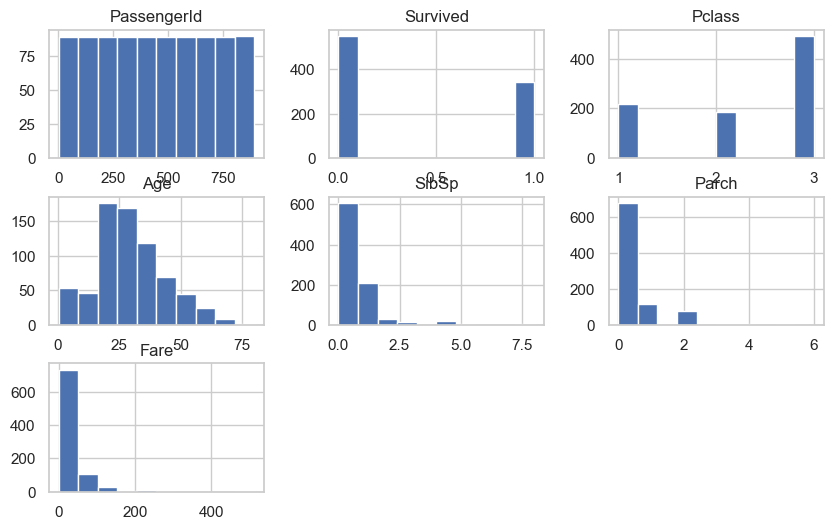

In [13]:
# ver histograma das variáveis numéricas
treino.hist()

**Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??**

In [14]:
# Analisar a probabilidade de sobrevivência pelo Sexo
treino[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


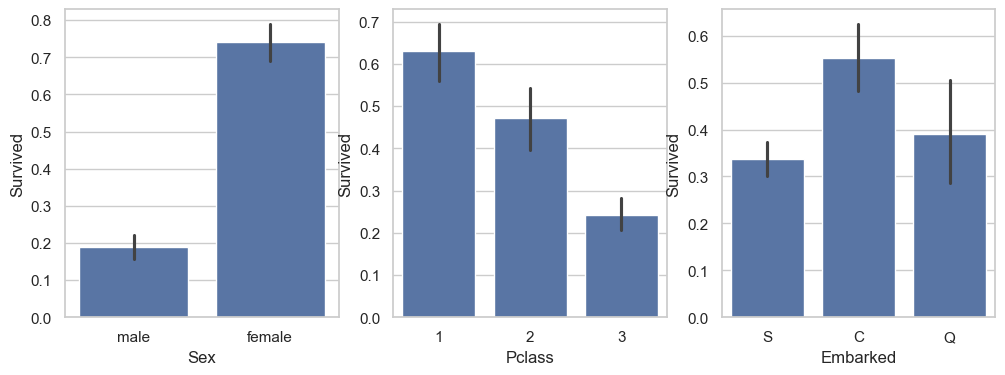

In [15]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=treino, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=treino, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=treino, ax=axis3);

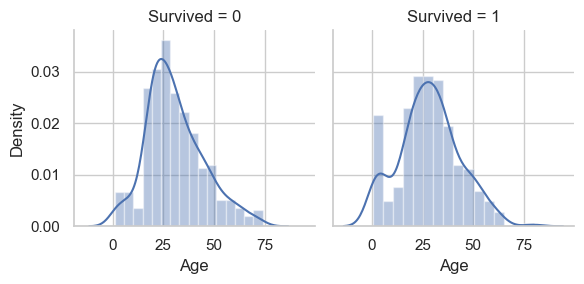

In [16]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(treino, col='Survived')
age_survived.map(sns.distplot, 'Age')

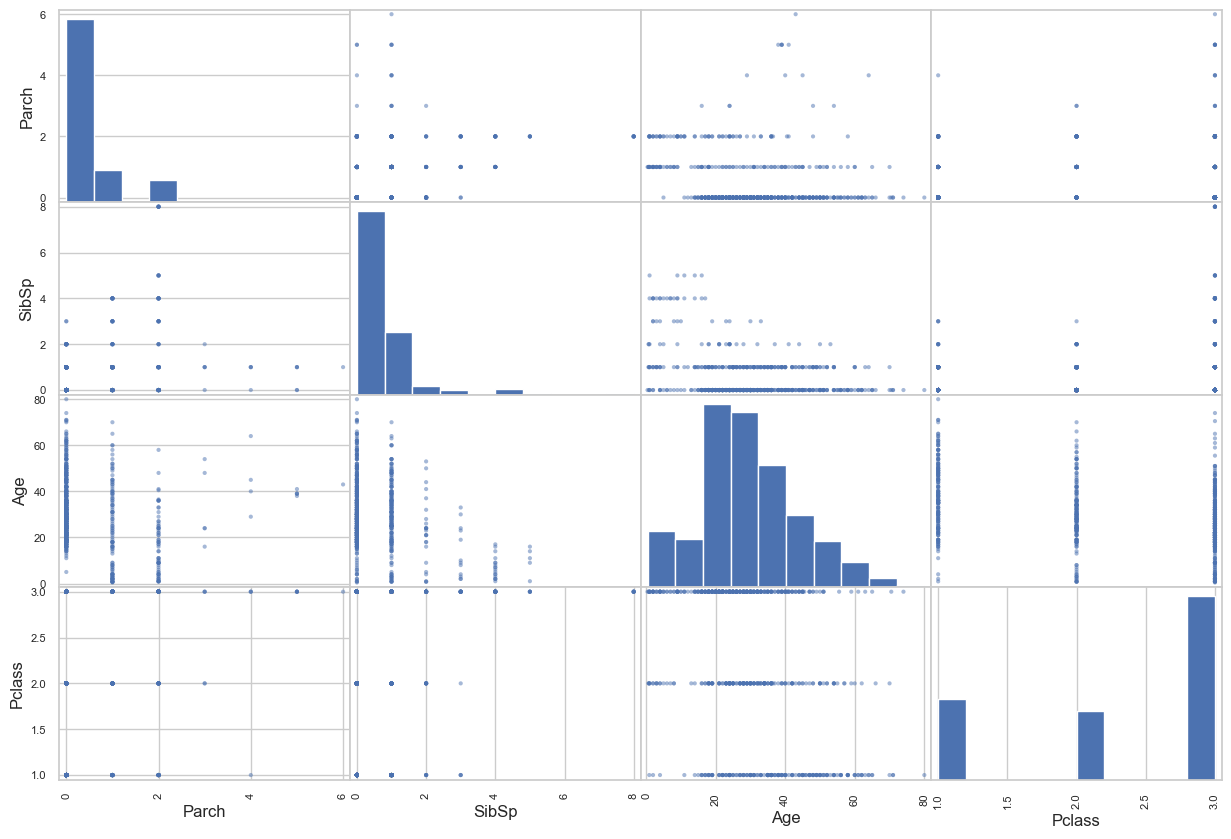

In [17]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(treino[columns], figsize=(15, 10));

In [18]:
treino.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**ATENÇÃO, é a letra 'O', e não o número 0!**

Pouca gente sabe que o método df.describe() pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento include=['O'].

**Olhando esses dados a gente observa que:**

- Os valores para Name são únicos, um para cada pessoa;
- Não há missing values para Name e Sex;
- Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
- O Porto no qual embarcaram mais passageiros é o de S = Southampton.

**Q5. Qual foi a taxa geral de sobrevivência?**

In [19]:
treino['Survived'].value_counts(normalize=True) * 100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

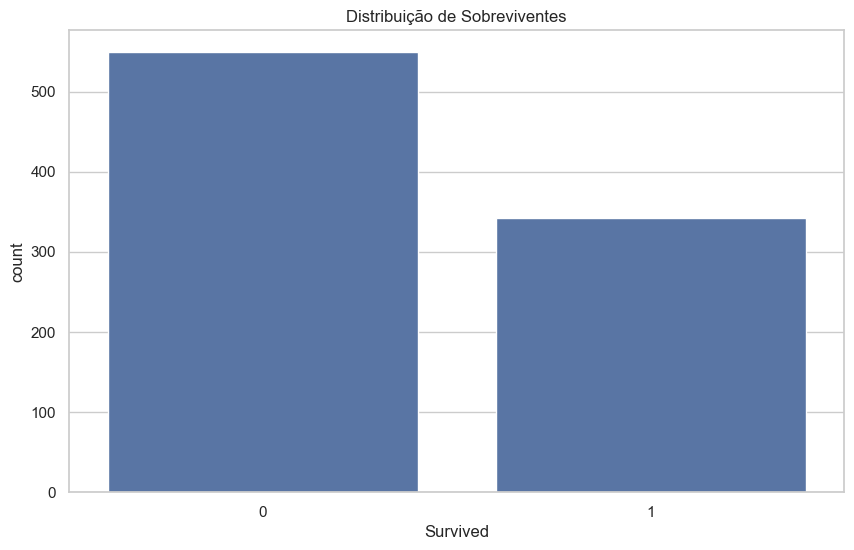

In [20]:
sns.countplot(data=treino, x="Survived")
plt.title("Distribuição de Sobreviventes")
plt.show()

**Q6. Sobrevivência por sexo?**

In [21]:
treino.groupby("Sex")["Survived"].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

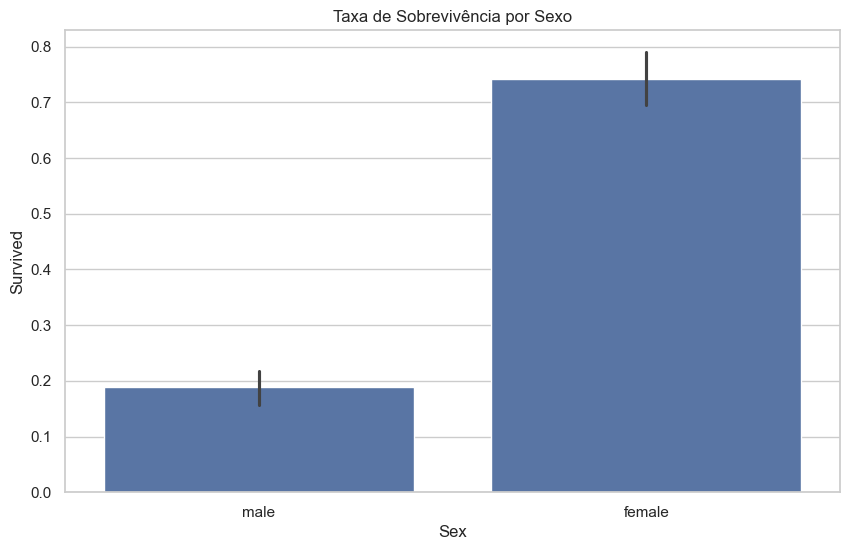

In [22]:
sns.barplot(data=treino, x="Sex", y="Survived")
plt.title("Taxa de Sobrevivência por Sexo")
plt.show()

**Q7. Sobrevivência por classe?**

In [23]:
treino.groupby("Pclass")["Survived"].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

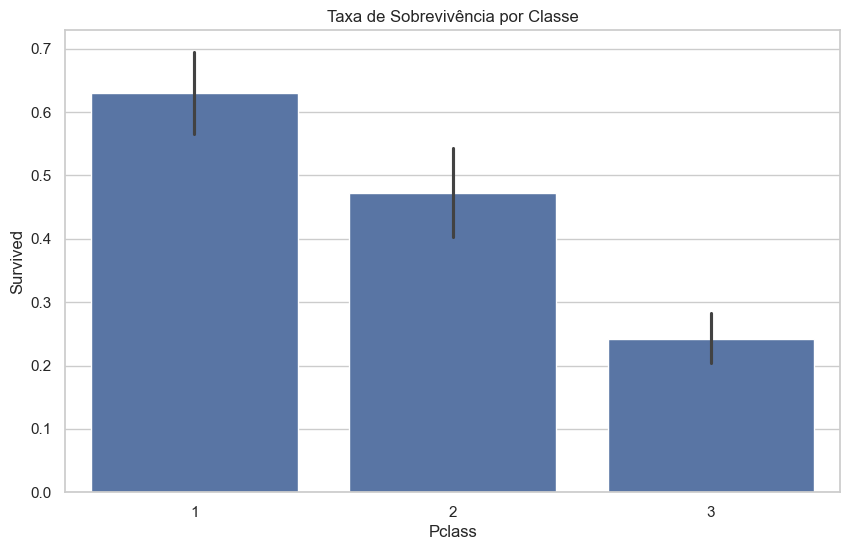

In [24]:
sns.barplot(data=treino, x="Pclass", y="Survived")
plt.title("Taxa de Sobrevivência por Classe")
plt.show()

**Q8. Idade e sobrevivência**

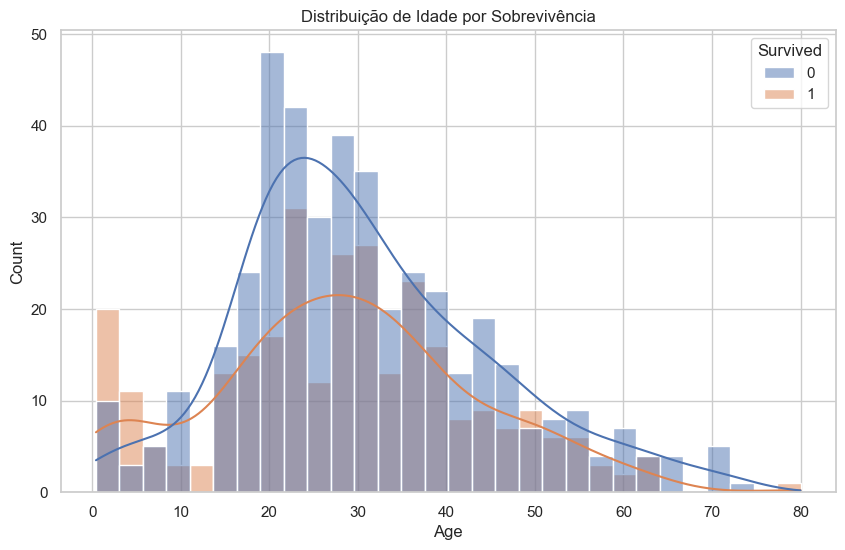

In [25]:
sns.histplot(data=treino, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Distribuição de Idade por Sobrevivência")
plt.show()

**Q9. Faixa etária**

In [26]:
def faixa_etaria(age):
    if age < 12:
        return "Criança"
    elif age < 60:
        return "Adulto"
    else:
        return "Idoso"

treino["FaixaEtaria"] = treino["Age"].apply(faixa_etaria)
treino.groupby("FaixaEtaria")["Survived"].mean() * 100

FaixaEtaria
Adulto     39.354839
Criança    57.352941
Idoso      29.064039
Name: Survived, dtype: float64

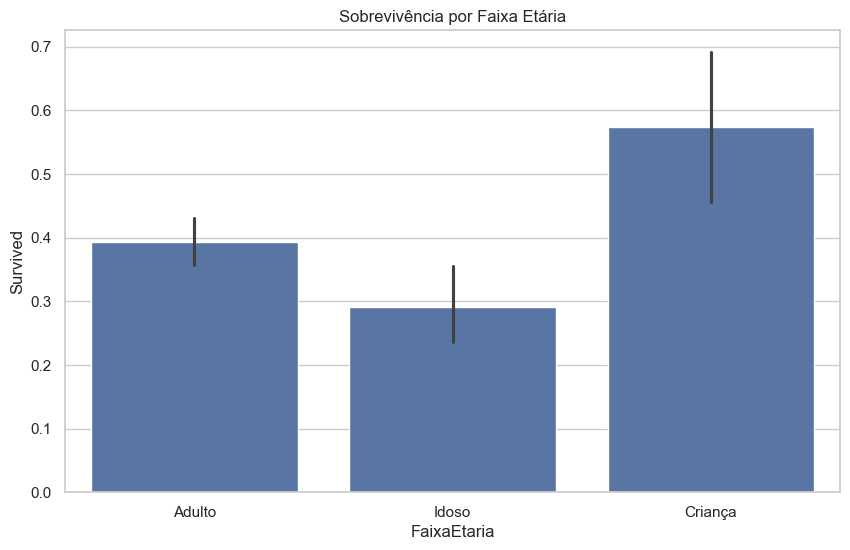

In [27]:
sns.barplot(data=treino, x="FaixaEtaria", y="Survived")
plt.title("Sobrevivência por Faixa Etária")
plt.show()

**Q10. Preço da Passagem**

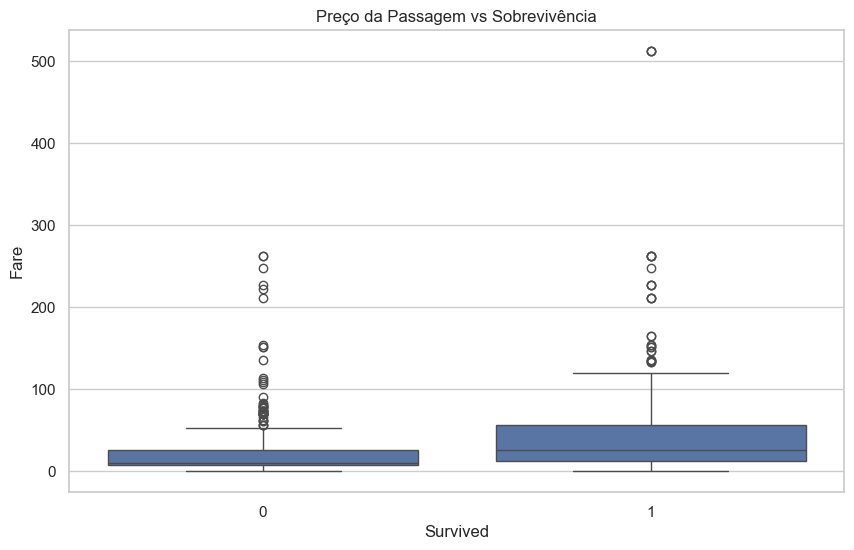

In [28]:
sns.boxplot(data=treino, x="Survived", y="Fare")
plt.title("Preço da Passagem vs Sobrevivência")
plt.show()

**Q11. Tamanho da família?**

In [29]:
treino["FamilySize"] = treino["SibSp"] + treino["Parch"] + 1
treino.groupby("FamilySize")["Survived"].mean() * 100

FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

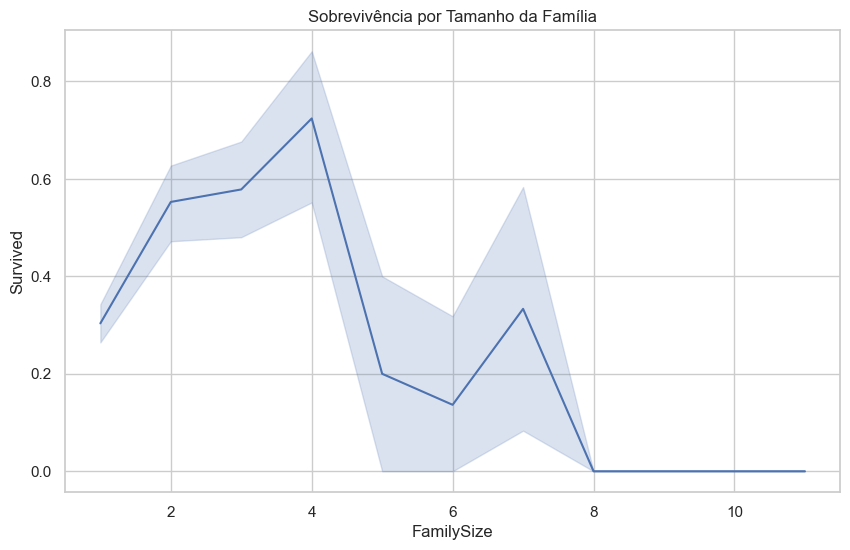

In [30]:
sns.lineplot(data=treino, x="FamilySize", y="Survived")
plt.title("Sobrevivência por Tamanho da Família")
plt.show()

## Respostas Preliminares

- Sexo e classe social influenciaram fortemente a sobrevivência
- Crianças e passageiros de classes mais altas tiveram maior chance
- O dataset é ideal para introdução à análise de dados e ML

## Preparação dos Dados

Até o presente momento, tudo o que fizemos foi importar os dados para estruturas DataFrame, formular hipóteses, iniciar uma análise exploratória dos dados e visualizar graficos e correlações entre aquelas variáveis que julgamos pertinente.

Um projeto de data science não é amarrado e rigoroso, onde a gente segue um passo-a-passo linear, mas sim um processo iterativo, onde a gente vai e volta sempre que for necessário.

Quando a gente pega o notebook de alguém, fica sempre a impressão que está bem estruturado e que foi "direto ao ponto*. No entanto, antes de trazer uma versão bonitinha, eu vou e volto ao começo inúmeras vezes!

Lembre-se disso: uma versão final é uma versão que foi reescrita várias vezes. Vá e volte ao começo sempre que precisar para adicionar informações novas que fizeram sentido :)

### Juntando os datasets de treino e teste
Uma dica para quando você vai preparar os dados para um modelo de Machine Learning é juntar os datasets de treino e teste em um único, e separar novamente no final.

Muitas vezes a gente vai fazer um feature engineering, criar variáveis dummy ou codificar as variáveis. Daí, nosso modelo vai ser treinado em cima dessa arquitetura, e os dados de teste vão ter que seguir essa mesma estrutura.

Por isso, é muito mais fácil fazer todas as etapas para um único DataFrame e dividir novamente entre treino e teste.

In [31]:
# salvar os índices dos datasets para recuperação posterior
treino_idx = treino.shape[0]
teste_idx = teste.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = teste['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = treino.Survived.copy()
treino.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_mergeado = pd.concat(objs=[treino, teste], axis=0).reset_index(drop=True)

print("df_mergeado: ({} x {})".format(df_mergeado.shape[0], df_mergeado.shape[1]))

df_mergeado: (1309 x 13)


## Selecionar as features

Como qualquer conjunto de dados do mundo real, você vai se deparar sempre com dados que não servem para nada e outros que não tem peso ou significância nenhuma no seu modelo.

Muitas vezes nosso julgamento pode ser equivocado, mas infelizmente é papel seu, como cientista de dados, escolher quais features serão usadas para o modelo de Machine Learning.

No nosso caso, vamos desconsiderar as variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois aparentemente não parecem relevantes.

In [32]:
df_mergeado.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Assim, ficamos com as seguintes variáveis a serem tratadas e preparadas: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'].

### Valores faltante

Vamos dar uma olhada nos valores que faltam em cada columna e tratar esses campos vazios.
Normalmente, há duas abordagens mais utilizadas quando a gente encontra missing values:
- Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); e
- Excluir a linha inteira.

Cada caso é um caso e novamente você, cientista de dados, é quem vai tomar a decisão sobre qual passo seguir.

Na maioria das vezes não é desejável jogar informação de uma linha inteira só por causa de um campo faltando. Sempre que possível é melhor você preencher o campo, e é isso que vamos fazer.

In [33]:
# completar ou apagar valores faltantes nos datasets de treino e teste
df_mergeado.isnull().sum()

Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
FaixaEtaria    418
FamilySize     418
dtype: int64

Para as variáveis idade e tarifa, vou colocar o valor da mediana, e para a variável do porto de embarque, vou colocar o valor com maior frequência.

In [34]:
# age
age_median = df_mergeado['Age'].median()
df_mergeado['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_mergeado['Fare'].median()
df_mergeado['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_mergeado['Embarked'].value_counts()[0]
df_mergeado['Embarked'].fillna(embarked_top, inplace=True)

In [35]:
df_mergeado.isnull().sum()

Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FaixaEtaria    418
FamilySize     418
dtype: int64

### Preparar as variáveis pro modelo

O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números.

Como você vê abaixo, eu convertir os valores possíveis de Sexpara {'male': 0, 'female': 1}. Já em relação à variável Embarked, apliquei o conceito de variáveis dummies.

As variáveis dummies (dummy variables) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica. Para ficar mais fácil entender, veja como fica o DataFrame após todos esses tratamentos:

In [36]:
# converter 'Sex' em 0 e 1
df_mergeado['Sex'] = df_mergeado['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_mergeado['Embarked'], prefix='Embarked')
df_mergeado = pd.concat([df_mergeado, embarked_dummies], axis=1)
df_mergeado.drop(['Embarked', 'Embarked_914'], axis=1, inplace=True)

df_mergeado.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,FaixaEtaria,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,Adulto,2.0,False,False,True
1,1,1,38.0,1,0,71.2833,Adulto,2.0,True,False,False
2,3,1,26.0,0,0,7.9250,Adulto,1.0,False,False,True
3,1,1,35.0,1,0,53.1000,Adulto,2.0,False,False,True
4,3,0,35.0,0,0,8.0500,Adulto,1.0,False,False,True


In [37]:
# converter 'FixaEtaria em 0, 1 e 2
df_mergeado['FaixaEtaria'] = df_mergeado['FaixaEtaria'].map({'Criança': 0, 'Adulto': 1, "Idoso": 2})
df_mergeado.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,FaixaEtaria,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,1.0,2.0,False,False,True
1,1,1,38.0,1,0,71.2833,1.0,2.0,True,False,False
2,3,1,26.0,0,0,7.9250,1.0,1.0,False,False,True
3,1,1,35.0,1,0,53.1000,1.0,2.0,False,False,True
4,3,0,35.0,0,0,8.0500,1.0,1.0,False,False,True


### Recuperando os datasets de treino e teste

Aqui a gente acabou de preparar o dataset para o modelo e vou dividir df_merged em train e test, exatamente como era no começo.

Agora você consegue entender a razão da concatenação lá em cima. Teríamos trabalho dobrado e ainda teria o risco de errarmos em alguma etapa.

In [38]:
# recuperar datasets de treino e teste
treino = df_mergeado.iloc[:treino_idx]
teste = df_mergeado.iloc[treino_idx:]

## Construção do Modelo e Avaliação

In [39]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [40]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(treino, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(treino, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.36


In [41]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(treino, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(treino, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [45]:
# declarar os valores das variáveis para mim e minha esposa
adriano = np.array([2, 0, 35, 1, 1, 32.2, 1, 1,  0, 0, 1]).reshape((1, -1))

# verificar se nós teríamos sobrevivido
print("Adriano:\t{}".format(tree_model.predict(adriano)[0]))


Adriano:	0
